  ## Data Wrangling with Python

Import needed packages (Pandas and OS). If you do not have pandas installed (i.e., you're working with base python; if you have anaconda, you'll be fine) install using `pip install pandas` at the command line. Here is a link to [`pandas` documentation](https://pandas.pydata.org/docs/)

In [1]:
import pandas as pd, os, numpy as np, seaborn as sns

Download data (see link from [R tutorial](tidying-data.html), but here it is again): [race/ethnicity according to the 2010 census](https://www.prisonpolicy.org/data/race_ethnicity_gender_2010.xlsx)

Use Python's `os` module to list contents of data directory to verify that you have the data (and you know where it is)

In [2]:
os.listdir("data")

['.DS_Store',
 'race_ethnicity_gender_2010.xlsx',
 'az_incarceration_rates_2010.csv']

Use Pandas [`read_excel`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) method to read Excel sheet into Pandas DataFrame

In [3]:
incarceration_data_2010 = pd.read_excel("data/race_ethnicity_gender_2010.xlsx",
                                      sheet_name = "Total",
                                      skiprows = range(4))
incarceration_data_2010.head()

,GEOID,GEOID2,Geography,Total : In Correctional Facilities for Adults,White alone : in Correctional Facilities for Adults,Black or African American alone : in Correctional Facilities for Adults,American Indian and Alaska Native alone : in Correctional Facilities for Adults,Asian alone : in Correctional Facilities for Adults,Native Hawaiian and other Pacific Islander alone : in Correctional Facilities for Adults,Some other race alone : in Correctional Facilities for Adults,...,Incarceration rate,Incarceration rate: White alone,Incarceration rate: Black or African American alone,Incarceration rate: American Indian and Alaska Native alone,Incarceration rate: Asian alone,Incarceration rate: Native Hawaiian and other Pacific Islander alone,Incarceration rate: Some other race alone,Incarceration rate: Two or more races,Incarceration rate: Hispanic or Latino,"Incarceration rate: White alone, not Hispanic or Latino"
0,0100000US,NaN,United States,2263602,1139749,897875,37854,16928,5494,142908,...,733.161041,509.833305,2306.423598,1290.954926,115.35852,1017.382915,747.920907,253.011603,831.079627,450.140748
1,0400000US01,1.0,Alabama,41177,18087,22377,80,57,3,283,...,861.491095,552.208376,1788.284447,283.506981,106.353205,98.135427,292.023527,407.011831,766.694324,535.326092
2,0400000US02,2.0,Alaska,4206,1812,301,1579,44,49,31,...,592.201692,382.620741,1293.900185,1505.659334,115.379573,661.357808,279.228968,751.807229,649.698081,369.849776
3,0400000US04,4.0,Arizona,67767,36160,8246,6723,1136,1029,12876,...,1060.181786,774.781712,3183.685446,2267.231873,642.915759,8135.673624,1690.393795,731.562071,1452.867294,633.366769
4,0400000US05,5.0,Arkansas,25844,13844,10943,167,115,10,553,...,886.307502,616.596347,2432.345325,750.62927,318.541909,170.561146,555.382591,371.864585,915.345337,592.877101


Select row where `Geography == Arizona` and list column names

In [4]:
az_data = incarceration_data_2010[incarceration_data_2010['Geography'] == 'Arizona'].copy()
az_data.columns

Index(['GEOID', 'GEOID2', 'Geography',
       'Total : In Correctional Facilities for Adults',
       'White alone : in Correctional Facilities for Adults',
       'Black or African American alone : in Correctional Facilities for Adults',
       'American Indian and Alaska Native alone : in Correctional Facilities for Adults',
       'Asian alone : in Correctional Facilities for Adults',
       'Native Hawaiian and other Pacific Islander alone : in Correctional Facilities for Adults',
       'Some other race alone : in Correctional Facilities for Adults',
       'Two or more races : in Correctional Facilities for Adults',
       'Hispanic or Latino : in Correctional Facilities for Adults',
       'White alone, not Hispanic or Latino : in Correctional Facilities for Adults',
       'Unnamed: 13', 'Total Population', 'Total Population: White alone',
       'Total Population: Black or African American alone',
       'Total Population: American Indian and Alaska Native alone',
       'Tota

We want only the columns that start with "Incarceration Rate", plus the `Geography` column

In [5]:
az_incarceration_rate = az_data[['Geography'] + 
                                [col_name for col_name in az_data.columns if "Incarceration rate" in col_name]]
az_incarceration_rate

,Geography,Incarceration rate,Incarceration rate: White alone,Incarceration rate: Black or African American alone,Incarceration rate: American Indian and Alaska Native alone,Incarceration rate: Asian alone,Incarceration rate: Native Hawaiian and other Pacific Islander alone,Incarceration rate: Some other race alone,Incarceration rate: Two or more races,Incarceration rate: Hispanic or Latino,"Incarceration rate: White alone, not Hispanic or Latino"
3,Arizona,1060.181786,774.781712,3183.685446,2267.231873,642.915759,8135.673624,1690.393795,731.562071,1452.867294,633.366769


Create "tidied" dataframe that contains columns for geography, race/ethnicity, and incarceration rate:

In [6]:
incarceration_rate = az_incarceration_rate.iloc[0, 1:].copy()
geo = np.full(len(incarceration_rate), az_data.Geography.values.copy()) 
race_ethnicity = ['Population at large'] + [col_name.replace('Incarceration rate: ', '') for col_name in az_incarceration_rate.columns[2:]]
az_incarceration_rate_tidy = pd.DataFrame(np.column_stack((geo, race_ethnicity, incarceration_rate)), columns = ['geography', 'race_ethnicity', 'incarceration_rate'])
az_incarceration_rate_tidy

,geography,race_ethnicity,incarceration_rate
0,Arizona,Population at large,1060.181786
1,Arizona,White alone,774.781712
2,Arizona,Black or African American alone,3183.685446
3,Arizona,American Indian and Alaska Native alone,2267.231873
4,Arizona,Asian alone,642.915759
5,Arizona,Native Hawaiian and other Pacific Islander alone,8135.673624
6,Arizona,Some other race alone,1690.393795
7,Arizona,Two or more races,731.562071
8,Arizona,Hispanic or Latino,1452.867294
9,Arizona,"White alone, not Hispanic or Latino",633.366769


If we want, we can change type of `incarceration_rate` column data to float! You will actually be able to interact with these values without changing the type because the default type in Python is `object`, but including this to be consistent with the R tutorial and demonstrate how you might do this (if you needed to) in Python:

In [7]:
az_incarceration_rate_tidy.incarceration_rate = az_incarceration_rate_tidy.incarceration_rate.astype(float)

Sort values in descending order by `incarceration_rate`

In [8]:
az_incarceration_rate_tidy = az_incarceration_rate_tidy.sort_values("incarceration_rate", ascending = False)

Use [seaborn](https://seaborn.pydata.org/examples/part_whole_bars.html) to plot data.

[Text(0.5, 0, 'incarceration rate per 100k '),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Incarceration rates per 100k people in Arizona')]

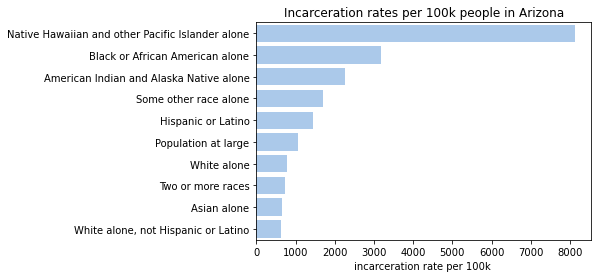

In [9]:
sns.set_color_codes("pastel")
ax = sns.barplot(x="incarceration_rate", y="race_ethnicity", data=az_incarceration_rate_tidy, color="b")
ax.set(xlabel = "incarceration rate per 100k ", 
       ylabel = "", 
       title = "Incarceration rates per 100k people in Arizona")

Write tidy data to csv file

In [10]:
az_incarceration_rate_tidy.to_csv('data/az_incarceration_rates_2010.csv', sep = ";", index = False)